#Eigen Faces

This mini project focuses on exploring the Yale Face Database through singular value decomposition to create eigen faces. First, faces from the dataset are displayed, and we then center the face dataset by calculating the average face and subtracting the result from all faces. Using the centered data, we then calculate the singular value decomposition values to get the eigen faces (vectors) of the dataset. After displaying the eigen faces, we use the eigen faces to approximate faces that were left out of our original 'training' data, as well as calculate and plot how much of each eigen face is present in a particular face image.

##Part 1 - Preparing the Data

This part of the assignment downloads the data from dropbox, converts the MATLAB workspace file to python lists, and displays the images to ensure that the dataset was properly prepared into the lists.



**Dependencies**

In [ ]:
#Dependencies used for converting .mat to python lists
#and downloading from dropbox
!pip install pymatreader
!pip install dropbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.0/594.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pymatreader import read_mat
import dropbox

**Data Preparation**

In [ ]:
#Authenticate with Dropbox API using access token
access_token = 'sl.BwJBD5vxhYzcuT2UGaqV3MmBSi9r4WD4TfO86dvdZMJT4jjrHffvKblA1_RB-SF5FYRXJ2UWGExUOLlj9Tmy4eeNbXx--Z_NMeexUwwCiFTZ3mVpK2lTav0A4dmoE0816N1WPM7v2vPN'
dbx = dropbox.Dropbox(access_token)

dropbox_file_path = "/documents/facedata.mat"
colab_destination_path = 'file.mat'

#Download the file from Dropbox
with open(colab_destination_path, 'wb') as f:
    metadata, res = dbx.files_download(dropbox_file_path)
    f.write(res.content)

print("File downloaded successfully.")

File downloaded successfully.


In [ ]:
#Read data from matlab workspace file
data = read_mat('file.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'faces', 'm', 'n', 'nfaces', 'person', 'sub'])

In [ ]:
#Convert matlab data into separate lists for each matlab variable
faces = data['faces']
m = data['m']
n = data['n']
nfaces = data['nfaces']
person = data['person']
sub = data['sub']

**Printing Images from the Dataset**

In [ ]:
Person = np.zeros((36, n, m))
Person[0,:,:] = np.transpose(np.reshape(faces[:, 0], (m, n)))

Checking first face in the dataset:
-----------------------------------


[]

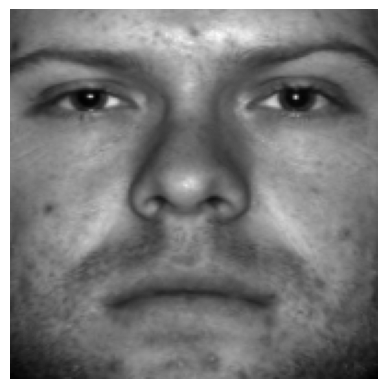

In [ ]:
#Displaying the first image of the dataset
plt.imshow(Person[0,:,:], cmap='gray')
plt.axis('off')
plt.gca().set_aspect(0.8802, adjustable='box')
print("Checking first face in the dataset:")
print("-----------------------------------")
plt.plot()

Plotting first pictures of person # 1 to person # 36:
----------------------------------------------------


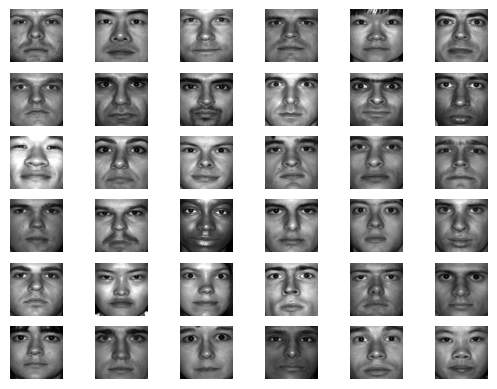

In [ ]:
#Displaying the first image of person 1-36
j=0
for i in range(36):
    Person[i, :, :] = np.transpose(np.reshape(faces[:, j], (m, n)))
    j = int(j + nfaces[i])
    plt.subplot(6, 6, i + 1)
    plt.imshow(Person[i, :, :], cmap='gray')
    plt.axis('off')
    plt.gca().set_aspect(0.8802, adjustable='box')
print("Plotting first pictures of person # 1 to person # 36:")
print("----------------------------------------------------")
plt.show()

Plotting all pictures of person # 1:
-----------------------------------


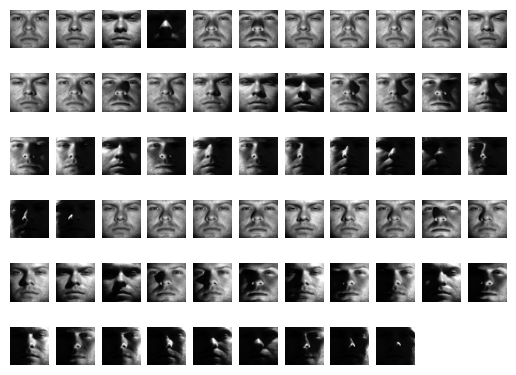

In [ ]:
#Displaying all images of the first person
Person = np.zeros((64, n, m))
for i in range(64):
    Person[i, :, :] = np.transpose(np.reshape(faces[:, i], (m, n)))
    plt.subplot(6, 11, i+1)
    plt.imshow(Person[i, :, :], cmap='gray')
    plt.axis('off')
    plt.gca().set_aspect(0.8802, adjustable='box')
print("Plotting all pictures of person # 1:")
print("-----------------------------------")
plt.show()

Plotting all pictures of person # 2:
-----------------------------------


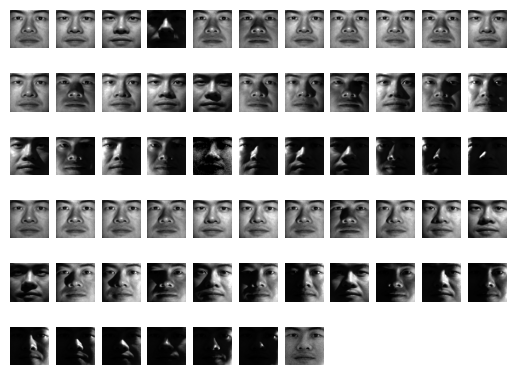

In [ ]:
#Displaying all images of the first person
Person = np.zeros((nfaces[1], n, m))
for i in range(nfaces[1]):
    Person[i, :, :] = np.transpose(np.reshape(faces[:, i+nfaces[0]], (m, n)))
    plt.subplot(6, 11, i+1)
    plt.imshow(Person[i, :, :], cmap='gray')
    plt.axis('off')
    plt.gca().set_aspect(0.8802, adjustable='box')
print("Plotting all pictures of person # 2:")
print("-----------------------------------")
plt.show()

##Part 2 - Average Face and Centering the Data

Next, we use all faces of the first 36 people in the dataset to calculate and plot the average face. We then create a new centered dataset by subtracting the average face from all images across the first 36 people, which will then be used to calculate the singular value decomposition in the next part.

**Calculating the Average Face**

In [ ]:
#Find total number of images in the first 36 people
temp = 0
for i in range(36):
  temp = temp + nfaces[i]

In [ ]:
#Averaging all faces from the first 36 people
ave_face = np.zeros(32256)
for i in range(temp):
    ave_face = faces[:, i] + ave_face
ave_face = ave_face/temp

The average face of all faces across the first 36 people:
---------------------------------------------------------


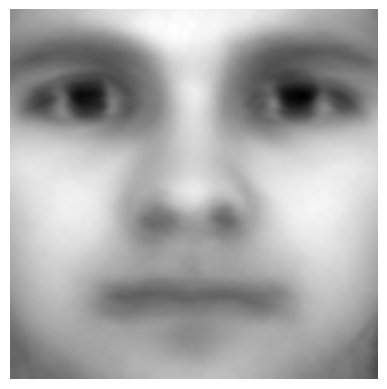

In [ ]:
#Displaying the average face
plt.imshow(np.transpose(np.reshape(ave_face, (m, n))), cmap='gray')
plt.axis('off')
plt.gca().set_aspect(0.8802, adjustable='box')
print("The average face of all faces across the first 36 people:")
print("---------------------------------------------------------")
plt.show()

**Centering the Data**

In [ ]:
#Subtracting the average face from each face amoung the first 36 people
x = np.zeros((32256, temp))
for i in range(temp):
  x[:,i] = (faces[:, i] - ave_face)

##Part 3 - SVD and Eigen Faces

This part of the assignment uses the new centered dataset of the first 36 people to calculate the singular value decomposition. We save the U vector, singular value vector S, and V transpose vector after running economy SVD from the python NumPy library. Next, we reshape the U vector to 2-dimensional pictures of size 192 by 168 to display the first 54 eigen faces calculated by the SVD.



**Performing SVD**

In [ ]:
# perform economy SVD
U, S, Vt = np.linalg.svd(x, full_matrices=False)

**Displaying Eigen Faces**

First 54 eigen faces:
---------------------


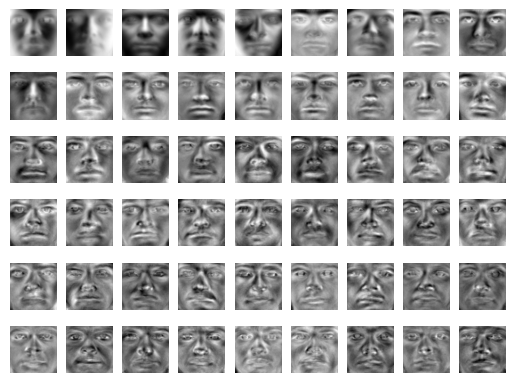

In [ ]:
#Plotting the first 54 eigen faces
for i in range(54):
    plt.subplot(6, 9, i+1)
    plt.imshow(np.transpose(np.reshape(U[:,i], (m, n))), cmap='gray')
    plt.axis('off')
    plt.gca().set_aspect(0.8802, adjustable='box')
print("First 54 eigen faces:")
print("---------------------")
plt.show()

**Carefully investigate these eigen faces. Do you think each eigen face is trying to detect
certain features?**

Yes, each eigen face seems to be focusing on certain features of the human face. The first few eigen faces are more generalized and look like blurry versions of the average human face in different lighting scenarios. However, after about face 5, the eigen faces become sharper and seem to focus on more specific features. The position of the lips, eyebrows, cheeks, nose, shadows, and even face muscle contraction becomes more prominent and noticeable. However, each photo has a different yet specific combination of those facial features that it appears to capture and focus on. Thus, each eigen face is attempting to detect how much of a certain facial characteristic is in an image.


**Calculating the Inner Product of the Eigen Vectors**

In [ ]:
inner_product = np.dot(U[:,0], U[:,4])
print("Inner product of 1st and 5th vectors: ", inner_product)

Inner product of 1st and 5th vectors:  4.440892098500626e-16


In [ ]:
inner_product = np.dot(U[:,9], U[:,14])
print("Inner product of 10th and 15th vectors: ", inner_product)

Inner product of 10th and 15th vectors:  -8.326672684688674e-17


**Compute the inner product of the first and the 5th eigen faces. Are these eigen faces orthogonal?
How about the 10th eigen face and 15th eigen face? Are they all orthogonal?**

The product of the first and 5th eigen faces is 0.000000000000000441, and the product of the 10th and 15th eigen faces is -0.0000000000000000833. If two vectors are orthogonal, they are perpendicular, and their dot product is zero. Thus, both the 1st and 5th, and the 10th and 15th eigen faces are orthogonal. Although their dot product is not exactly zero, rounding error and precision limitations when multiplying the eigen vectors resulted in a dot product that is insignificantly small (less than 1*10^-15) and thus shows that the dot product is (essentially) zero and that the eigen faces are orthogonal. In general, any two eigen faces are orthogonal since matrix U contains the eigen vectors for the symmetric matrix x dot x transpose (where x is the data), and the eigen vectors of a symmetric matrix are always orthogonal to each other.



## Part 4 - Eigen Face Approximation

In this part of the assignment, we use the eigen faces calculated in part 3 to create approximations for faces that were not in the original 36-person training dataset. We plot the resulting face approximation for r = 5, 10, 200, and 800 eigen faces.



**Using Eigen Faces to Approximate Faces**

In [ ]:
#Function to approximate a face given the original face and the number of eigen faces (r) to use
def eigen_face_approximation(r, face):
  approx = np.zeros(32256)
  #Summation of an eigen face times the ammount of that specific eigen face in that image
  for i in range(r):
    approx = approx + np.dot(np.dot(np.transpose(U[:,i]), faces[:, face]), U[:,i])
  plt.imshow(np.transpose(np.reshape(approx, (m, n))), cmap='gray')
  plt.axis('off')
  plt.title('r = ' + str(r) + ' approximation for the first picture of person #37')
  plt.gca().set_aspect(0.8802, adjustable='box')
  plt.show()

**We are truncating at some r. What is the maximum value of r?**

The maximum value of r would be when r = m of the original data matrix, which is (n) 32256 by (m) 2282. Thus, the maximum value of r is 2282, which would be a perfect approximation to and fully restore the original face image.

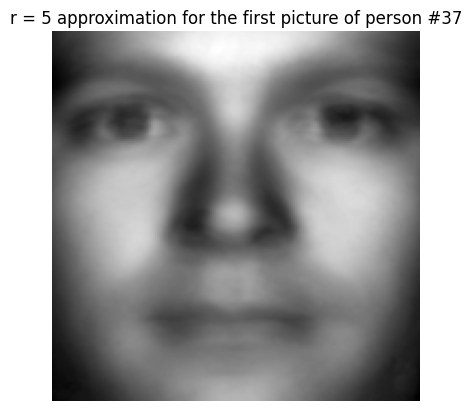

In [ ]:
eigen_face_approximation(5, temp)

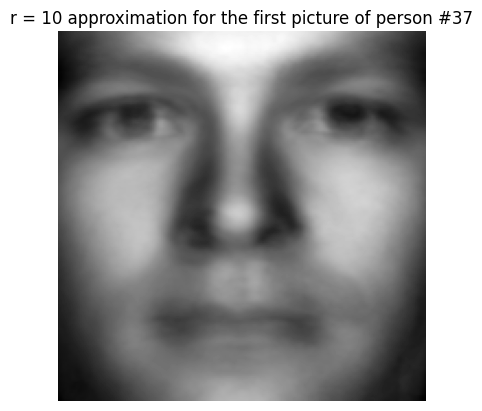

In [ ]:
eigen_face_approximation(10, temp)

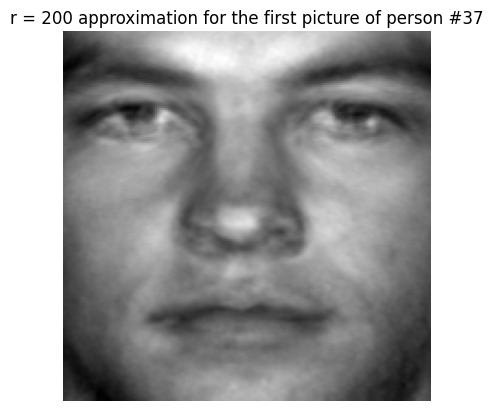

In [ ]:
eigen_face_approximation(200, temp)

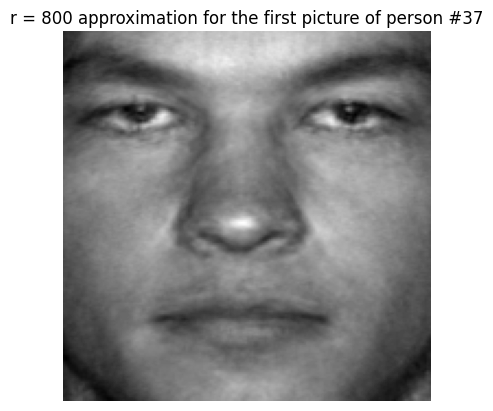

In [ ]:
eigen_face_approximation(800, temp)

**Do you think you can find a good approximation of the picture with r=100?**

The approximation of the picture with r=100, as shown below, is not a very good approximation. Although the overall facial features are starting to resemble the original face, the picture is still blurry and generalized in areas around the eyes, nose, lips, and eyebrows. Thus, a higher value for r is necessary to get a better detail in the more specific facial features of the image and get an acceptable/recognizable approximation for the original face. The singular value curve shown in part 5 is useful for estabishing a rough threshold for r that creates good enough approximations.


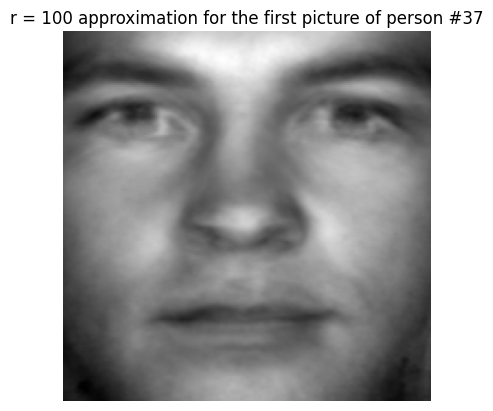

In [ ]:
eigen_face_approximation(100, temp)

## Part 5 - Plotting Singular Values

The next part of the assignment plots the singular values that we calculated using SVD in part 3. The singular values are plotted in a semi-logarithmic scale, with the horizontal axis representing the index, the vertical axis representing the value of the singular value scaled logarithmically.

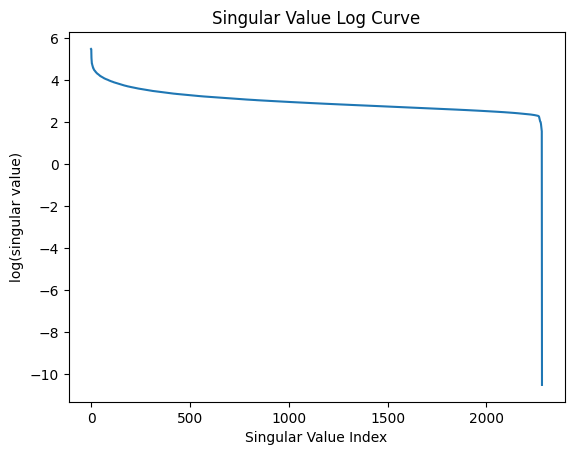

In [ ]:
plt.plot(np.log10(S))
plt.title('Singular Value Log Curve')
plt.xlabel('Singular Value Index')
plt.ylabel('log(singular value)')
plt.show()

**Do you see a good point for truncation?**

I would truncate at around 500 singular values. This point in the curve is just under the 'knee' of the plot where the larger singular values begin to stagnate. Thus, after around 500, the plot flattens out significantly and using any additional singular values would result in minor improvement of diminishing return to the image approximation. The threshold of 500 is further supported by the approximations that we made in part 4, with r=200 being too few to be a good approximation yet r=800 being a very good approximation that could be dialed back if needed, with 500 being a good in-between threshold.




##Part 6 - Eigen Face Compononents in a Face

In this final part of the assignment, we calculate how much of each eigen face is present in different faces. Then, by plotting how much of a specific eigen face is in the different pictures of a person, we show the differences between different faces based on their eigen face components. More specifically, we calculate and plot how much of each eigen faces 5 and 6 exist in all pictures of person 2 and person 7.

In [ ]:
#Calculate how much of eigen face 5 and 6 are in person 2
PCA5_2 = []
PCA6_2 = []
for i in range(nfaces[1]):
  PCA5_2.append(np.dot(np.transpose(faces[:,nfaces[0]+i]), U[:,4]))
for i in range(nfaces[1]):
  PCA6_2.append(np.dot(np.transpose(faces[:,nfaces[0]+i]), U[:,5]))

In [ ]:
print("How much of each eigen face 5 do we have in every picture of person # 2:")
print("------------------------------------------------------------------------")
print(PCA5_2)

How much of each eigen face 5 do we have in every picture of person # 2:
------------------------------------------------------------------------
[-222.95969654407554, -313.2782038665887, -413.11495902535717, -740.7840805850287, -320.91181912028645, -287.3963956432432, -461.3785308261795, -310.2091045156584, -351.7043857842541, -7.782441339349873, -301.9279058135712, -184.78936192440415, 136.00448082644573, -339.57432814640697, -692.7551752369704, -704.5500976082067, 246.27551936676176, 130.7800357925737, 935.5503529782068, -562.6817533730841, 1036.1809673762427, 1009.6343094001304, -1241.814408213123, 2069.909342155462, 50.944704155634085, 2229.8913080017187, -7.845601825506474, 1325.7522306717858, -516.5049402703086, -1343.7109031529576, 2483.5700461255906, 1697.0685951706953, 377.9923944696399, -410.0615278995308, -538.0556471797859, -519.4101367943085, -496.96684461172913, -327.55776796266855, -429.50032102845853, -507.0395422235997, -526.5199949598102, -546.9626699778137, -469.935

In [ ]:
print("How much of each eigen face 6 do we have in every picture of person # 2:")
print("------------------------------------------------------------------------")
print(PCA6_2)

How much of each eigen face 6 do we have in every picture of person # 2:
------------------------------------------------------------------------
[2116.629210710098, 2690.1930332278594, 3237.8069746590068, 371.9022150891707, 1461.226706715649, 701.0668641578949, 2550.340127338158, 1847.1155110825268, 2282.358471250667, 1509.387686359129, 2615.1314620832104, 2284.6098218138477, 383.2774764335091, 2309.8469551532758, 2754.523500633301, 2161.693579568938, 915.1136808572364, 1198.643280019759, -120.68851701508163, 1683.6560755861015, 228.50118679960121, 772.4312988747389, 1611.4081215009003, -76.02809627397869, 975.8417816582829, 401.3840805026273, 39.9584475542747, 337.9942893820944, 362.1196701065692, 372.1728470485902, 255.98867773699146, 137.47856112303924, -117.99433248927765, 2181.187050139366, 1927.5277991479597, 2183.967011044795, 1369.1708353267616, 2931.136516232949, 2658.885015971977, 1708.7742860250223, 112.28905546983391, 2065.4551846716913, 2630.6393592607433, 3197.3883798575

In [ ]:
#Calculate how much of eigen face 5 and 6 are in person 7
PCA5_7 = []
PCA6_7 = []
faces_before_7 = 0
for i in range(6):
  faces_before_7 = faces_before_7 + nfaces[i]
for i in range(nfaces[6]):
  PCA5_7.append(np.dot(np.transpose(faces[:,faces_before_7+i]), U[:,4]))
for i in range(nfaces[6]):
  PCA6_7.append(np.dot(np.transpose(faces[:,faces_before_7+i]), U[:,5]))

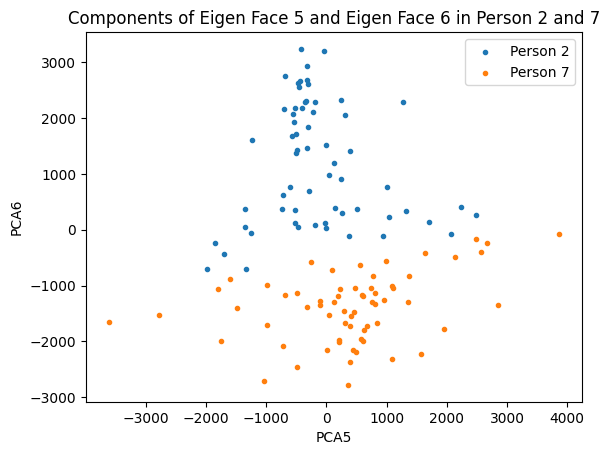

In [ ]:
#Scatter plot PCA5 vs PCA6
plt.scatter(PCA5_2, PCA6_2, marker='.', label='Person 2')
plt.scatter(PCA5_7, PCA6_7, marker='.', label='Person 7')

plt.title('Components of Eigen Face 5 and Eigen Face 6 in Person 2 and 7')
plt.xlabel('PCA5')
plt.ylabel('PCA6')
plt.legend()
plt.show()

**Can you use this graph to
implement a good classification algorithm for face recognition? Can you do this with SVM?**

Yes, you could use this graph to implement a good classification algorithm for face recognition. By using the ammount of eigen faces 5 and 6 in the pictures as the axes, the pictures from person 2 and person 7 lie in distinct and separable regions of the graph. This means that the graph could be used to classify faces based on which region of the graph the data ends up in after calculating the amount of PCA5 and PCA6 in the image. SVM could be used to create a good decision boundary which separates the two faces in the graph above since the data from the classes is separate and does not overlap. The SVM algoirthm will attempt to find the optimal hyperplane (in this case line since we are in two dimensions) that separates the two classes while maximizing the margin between the closest points of the different classes. The decision boundary could then be applied to other data to serve as a face recognition algorithm.

